# yelp capstone project
Consist of 5 tables e.g Business, Review, User, Tip, Checkin.\
For dataset details kindly [visit](https://www.yelp.com/dataset/documentation/main)\
Bootcamper : Robert, Sining, Theresa, Kamruddin

The project was initialized and capstoned to pass the knowledge and learning into application.

Now we are importing necessary packages 

In [44]:
import json
import pandas as pd
import sqlalchemy
from dotenv import dotenv_values
from dotenv import load_dotenv
import psycopg2

In [2]:
import sql_functions as sf
from sql_functions import get_sql_config, get_data, get_dataframe, get_engine

In [3]:
# add 'data/' to .gitignore so that you do not upload data to github
#!echo 'data/' >> .gitignore

Opening json file from business dataset together with unpacking 'arrributes' columns to find to particular hypothetic columns.

In [3]:
data = []

with open('data/yelp_academic_dataset_business.json') as f:

    for line in f:
        
        #Parse the JSON data
        json_dict = json.loads(line)

        if json_dict['attributes']:
            if 'BusinessParking' in json_dict['attributes'].keys():

                json_dict['attributes']['BusinessParking'] = eval(json_dict['attributes']['BusinessParking'])

        data.append(json_dict)

normlize dataset

In [4]:
biz_df = pd.json_normalize(data)

In [6]:
biz_df.shape

(150346, 65)

Now we have 150,346 rows and 65 columns. We need to clean on column level then deep dive into cells.

## Dropping empty category rows and reset index on existing dataframe

In [7]:
# drop row that have no category labels
biz_df.dropna(subset='categories', inplace=True)
# reset index
biz_df.reset_index(drop=True, inplace=True)

In [8]:
# import category labels from CSV and filter dataframe to keep row that have category label Approx 30 min
cat_data = pd.read_csv('data/categories.csv', header=None)
categories = cat_data[0].tolist()
filtered_df = pd.DataFrame()

filtered_df = biz_df.loc[biz_df['categories'].str.contains('|'.join(categories))]

In [9]:
filtered_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,attributes.AcceptsInsurance,attributes.BestNights,attributes.BYOB,attributes.Corkage,attributes.BYOBCorkage,attributes.HairSpecializesIn,attributes.Open24Hours,attributes.RestaurantsCounterService,attributes.AgesAllowed,attributes.DietaryRestrictions
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150224,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150225,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,AZ,85737,32.409552,-110.943073,4.5,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150233,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150236,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,19014,39.856185,-75.427725,4.5,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66819 entries, 3 to 150237
Data columns (total 65 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   business_id                            66819 non-null  object 
 1   name                                   66819 non-null  object 
 2   address                                66819 non-null  object 
 3   city                                   66819 non-null  object 
 4   state                                  66819 non-null  object 
 5   postal_code                            66819 non-null  object 
 6   latitude                               66819 non-null  float64
 7   longitude                              66819 non-null  float64
 8   stars                                  66819 non-null  float64
 9   review_count                           66819 non-null  int64  
 10  is_open                                66819 non-null  int64  
 11  catego

### Cleaning columns from business table

In [11]:
#1 dropping less important columns
filtered_df.drop(['address','postal_code','hours','is_open','attributes.ByAppointmentOnly', 'attributes.BikeParking','attributes.CoatCheck',
       'attributes.Caters', 'attributes.WiFi', 'attributes.WheelchairAccessible', 'attributes.HappyHour', 'attributes.HasTV', 'attributes.DogsAllowed', 'attributes.GoodForKids',
       'attributes.RestaurantsAttire', 'attributes.GoodForMeal', 'attributes.BusinessAcceptsBitcoin', 'attributes.Smoking','attributes.Music',
       'attributes.GoodForDancing', 'attributes.AcceptsInsurance', 'attributes.BestNights', 'attributes.BYOB', 'attributes.Corkage', 'attributes.BYOBCorkage',
       'attributes.HairSpecializesIn','attributes.AgesAllowed','attributes.DietaryRestrictions','attributes.BusinessParking','attributes', 'attributes.Ambience',
       'attributes.DriveThru', 'attributes.Open24Hours','attributes.RestaurantsCounterService','attributes.RestaurantsTableService','attributes.RestaurantsGoodForGroups'], axis=1, errors='ignore', inplace=True)

/var/folders/86/gt6_0hjj7c345vw90_3wrjnm0000gn/T/ipykernel_7356/1147229934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(['address','postal_code','hours','is_open','attributes.ByAppointmentOnly', 'attributes.BikeParking','attributes.CoatCheck',


In [12]:
filtered_df.isna().sum()

business_id                                  0
name                                         0
city                                         0
state                                        0
latitude                                     0
longitude                                    0
stars                                        0
review_count                                 0
categories                                   0
attributes.BusinessAcceptsCreditCards     8735
hours.Monday                             17335
hours.Tuesday                            14127
hours.Wednesday                          11737
hours.Thursday                           10755
hours.Friday                             10387
hours.Saturday                           11658
attributes.RestaurantsPriceRange2        10370
attributes.RestaurantsTakeOut             8896
attributes.RestaurantsDelivery           12934
attributes.BusinessParking.garage        11326
attributes.BusinessParking.street        12699
attributes.Bu

In [13]:
filtered_df.columns

Index(['business_id', 'name', 'city', 'state', 'latitude', 'longitude',
       'stars', 'review_count', 'categories',
       'attributes.BusinessAcceptsCreditCards', 'hours.Monday',
       'hours.Tuesday', 'hours.Wednesday', 'hours.Thursday', 'hours.Friday',
       'hours.Saturday', 'attributes.RestaurantsPriceRange2',
       'attributes.RestaurantsTakeOut', 'attributes.RestaurantsDelivery',
       'attributes.BusinessParking.garage',
       'attributes.BusinessParking.street',
       'attributes.BusinessParking.validated',
       'attributes.BusinessParking.lot', 'attributes.BusinessParking.valet',
       'attributes.OutdoorSeating', 'attributes.RestaurantsReservations',
       'hours.Sunday', 'attributes.Alcohol', 'attributes.NoiseLevel'],
      dtype='object')

In [14]:
#2 renaming the header
filtered_df.rename(columns={'attributes.BusinessAcceptsCreditCards': 'accepts_credit_cards','hours.Monday':'monday', 'hours.Tuesday':'tuesday','hours.Wednesday':'wednesday',
                       'hours.Thursday':'thursday','hours.Friday':'friday','hours.Saturday':'saturday','hours.Sunday':'sunday','attributes.RestaurantsPriceRange2':'price_range',
                       'attributes.RestaurantsTakeOut':'take_out','attributes.RestaurantsDelivery':'delivery','attributes.BusinessParking.garage':'parking_garage',
                       'attributes.BusinessParking.street':'parking_street','attributes.BusinessParking.validated':'parking_validated','attributes.BusinessParking.lot':'parking_lot',
                       'attributes.BusinessParking.valet':'parking_valet','attributes.OutdoorSeating':'outdoor_seating','attributes.RestaurantsReservations':'seats_reservations',
                       'attributes.Alcohol':'alcohol','attributes.Ambience':'ambience','attributes.RestaurantsTableService':'table_service','attributes.RestaurantsGoodForGroups':'for_groups',
                       'attributes.DriveThru':'drive_thru','attributes.Open24Hours':'open_24_hours','attributes.RestaurantsCounterService':'counter_service','attributes.NoiseLevel': 'noise_level'}, inplace=True)

/var/folders/86/gt6_0hjj7c345vw90_3wrjnm0000gn/T/ipykernel_7356/945557163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'attributes.BusinessAcceptsCreditCards': 'accepts_credit_cards','hours.Monday':'monday', 'hours.Tuesday':'tuesday','hours.Wednesday':'wednesday',


In [15]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66819 entries, 3 to 150237
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_id           66819 non-null  object 
 1   name                  66819 non-null  object 
 2   city                  66819 non-null  object 
 3   state                 66819 non-null  object 
 4   latitude              66819 non-null  float64
 5   longitude             66819 non-null  float64
 6   stars                 66819 non-null  float64
 7   review_count          66819 non-null  int64  
 8   categories            66819 non-null  object 
 9   accepts_credit_cards  58084 non-null  object 
 10  monday                49484 non-null  object 
 11  tuesday               52692 non-null  object 
 12  wednesday             55082 non-null  object 
 13  thursday              56064 non-null  object 
 14  friday                56432 non-null  object 
 15  saturday              5

In [16]:
filtered_df.columns

Index(['business_id', 'name', 'city', 'state', 'latitude', 'longitude',
       'stars', 'review_count', 'categories', 'accepts_credit_cards', 'monday',
       'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'price_range',
       'take_out', 'delivery', 'parking_garage', 'parking_street',
       'parking_validated', 'parking_lot', 'parking_valet', 'outdoor_seating',
       'seats_reservations', 'sunday', 'alcohol', 'noise_level'],
      dtype='object')

### Cleaning data inside the cells

In [17]:
filtered_df['alcohol'].unique()

array(["u'none'", nan, "u'full_bar'", "'none'", "'full_bar'",
       "u'beer_and_wine'", "'beer_and_wine'", 'None'], dtype=object)

In [18]:
filtered_df['noise_level'].unique()

array([nan, "u'average'", "u'quiet'", "'average'", "u'loud'",
       "u'very_loud'", "'quiet'", "'very_loud'", "'loud'", 'None'],
      dtype=object)

In [19]:
filtered_df['alcohol'] = filtered_df['alcohol'].str.replace("u'", "").str.replace("'", "")
filtered_df['noise_level'] = filtered_df['noise_level'].str.replace("u'", "").str.replace("'", "")

/var/folders/86/gt6_0hjj7c345vw90_3wrjnm0000gn/T/ipykernel_7356/3781653990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['alcohol'] = filtered_df['alcohol'].str.replace("u'", "").str.replace("'", "")
/var/folders/86/gt6_0hjj7c345vw90_3wrjnm0000gn/T/ipykernel_7356/3781653990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['noise_level'] = filtered_df['noise_level'].str.replace("u'", "").str.replace("'", "")


In [20]:
filtered_df['alcohol'].unique()

array(['none', nan, 'full_bar', 'beer_and_wine', 'None'], dtype=object)

In [21]:
filtered_df['noise_level'].unique()

array([nan, 'average', 'quiet', 'loud', 'very_loud', 'None'], dtype=object)

In [22]:
# creating function to check the Values either true in any case
def parking_check(row):
    if row['parking_garage'] == True or row['parking_street'] == True or row['parking_validated'] == True or row['parking_lot'] == True or row['parking_valet'] == True:
        return True
    else:
        return False

In [23]:
# running parking check by row if anywhere found True returns True in a new Column else all returning False.
filtered_df['parking_available'] = filtered_df.apply(parking_check, axis=1)

/var/folders/86/gt6_0hjj7c345vw90_3wrjnm0000gn/T/ipykernel_7356/3692541997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['parking_available'] = filtered_df.apply(parking_check, axis=1)


In [24]:
filtered_df

,business_id,name,city,state,latitude,longitude,stars,review_count,categories,accepts_credit_cards,...,parking_street,parking_validated,parking_lot,parking_valet,outdoor_seating,seats_reservations,sunday,alcohol,noise_level,parking_available
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",False,...,True,False,False,False,False,NaN,7:0-21:0,none,NaN,True
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,40.338183,-75.471659,4.5,13,"Brewpubs, Breweries, Food",True,...,None,None,True,False,NaN,NaN,12:0-18:0,NaN,NaN,True
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,TN,36.269593,-87.058943,2.0,6,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",True,...,NaN,NaN,NaN,NaN,True,False,8:0-22:0,none,NaN,False
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,Affton,MO,38.565165,-90.321087,3.0,19,"Pubs, Restaurants, Italian, Bars, American (Tr...",True,...,False,False,True,False,True,False,NaN,full_bar,average,True
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,Nashville,TN,36.208102,-86.768170,1.5,10,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",True,...,False,False,False,False,True,False,6:0-21:0,none,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150224,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,Boise,ID,43.615401,-116.284689,4.0,33,"Cafes, Juice Bars & Smoothies, Coffee & Tea, R...",True,...,False,False,True,False,True,False,0:0-0:0,none,loud,True
150225,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,Oro Valley,AZ,32.409552,-110.943073,4.5,41,"Specialty Food, Food, Coffee & Tea, Coffee Roa...",True,...,False,False,True,False,True,NaN,6:0-15:0,NaN,NaN,True
150233,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,Philadelphia,PA,39.935982,-75.158665,4.5,35,"Restaurants, Mexican",True,...,True,None,False,False,False,False,11:0-22:0,none,NaN,True
150236,2O2K6SXPWv56amqxCECd4w,The Plum Pit,Aston,DE,39.856185,-75.427725,4.5,14,"Restaurants, Comfort Food, Food, Food Trucks, ...",True,...,True,False,False,False,NaN,NaN,0:0-0:0,none,NaN,True


In [25]:
# dropping all the parking extensions from the table to be in more cleaned way
filtered_df.drop(['parking_garage', 'parking_street','parking_validated','parking_lot','parking_valet'], axis=1, inplace=True)

/var/folders/86/gt6_0hjj7c345vw90_3wrjnm0000gn/T/ipykernel_7356/1671550035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(['parking_garage', 'parking_street','parking_validated','parking_lot','parking_valet'], axis=1, inplace=True)


In [26]:
filtered_df

,business_id,name,city,state,latitude,longitude,stars,review_count,categories,accepts_credit_cards,...,saturday,price_range,take_out,delivery,outdoor_seating,seats_reservations,sunday,alcohol,noise_level,parking_available
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",False,...,7:0-21:0,1,True,False,False,NaN,7:0-21:0,none,NaN,True
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,40.338183,-75.471659,4.5,13,"Brewpubs, Breweries, Food",True,...,12:0-22:0,NaN,True,NaN,NaN,NaN,12:0-18:0,NaN,NaN,True
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,TN,36.269593,-87.058943,2.0,6,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",True,...,9:0-22:0,1,True,True,True,False,8:0-22:0,none,NaN,False
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,Affton,MO,38.565165,-90.321087,3.0,19,"Pubs, Restaurants, Italian, Bars, American (Tr...",True,...,NaN,1,True,False,True,False,NaN,full_bar,average,True
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,Nashville,TN,36.208102,-86.768170,1.5,10,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",True,...,6:0-17:0,1,True,True,True,False,6:0-21:0,none,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150224,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,Boise,ID,43.615401,-116.284689,4.0,33,"Cafes, Juice Bars & Smoothies, Coffee & Tea, R...",True,...,0:0-0:0,1,False,False,True,False,0:0-0:0,none,loud,True
150225,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,Oro Valley,AZ,32.409552,-110.943073,4.5,41,"Specialty Food, Food, Coffee & Tea, Coffee Roa...",True,...,6:0-15:0,2,True,False,True,NaN,6:0-15:0,NaN,NaN,True
150233,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,Philadelphia,PA,39.935982,-75.158665,4.5,35,"Restaurants, Mexican",True,...,11:0-2:0,2,True,True,False,False,11:0-22:0,none,NaN,True
150236,2O2K6SXPWv56amqxCECd4w,The Plum Pit,Aston,DE,39.856185,-75.427725,4.5,14,"Restaurants, Comfort Food, Food, Food Trucks, ...",True,...,0:0-0:0,1,True,False,NaN,NaN,0:0-0:0,none,NaN,True


### Now we have 66,819 rows and 25 analysable columns for further process.
### Calling review date and filter selected business_id

In [24]:
filtered_df['business_id'].nunique()

66819

## Filtering out dataset by state PA ######## (Execute Next 4 steps ) 

In [27]:
#1 create function for filtering by state

def state_filter(dataframe, column, state):
    businesses_new = dataframe[dataframe[column] == state].copy()
    return businesses_new

In [28]:
#2 filter for all businesses in Pennsylvania 

filtered_df_pa = state_filter(filtered_df, 'state', 'PA')

In [29]:
#3 delete the columns 'city', 'state', 

filtered_df_pa.drop(columns=['city', 'state'], inplace=True, errors='ignore')

Then the file will narrow down to 15,830 rows from 66,819 rows.

In [30]:
filtered_df_pa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15830 entries, 3 to 150233
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_id           15830 non-null  object 
 1   name                  15830 non-null  object 
 2   latitude              15830 non-null  float64
 3   longitude             15830 non-null  float64
 4   stars                 15830 non-null  float64
 5   review_count          15830 non-null  int64  
 6   categories            15830 non-null  object 
 7   accepts_credit_cards  14370 non-null  object 
 8   monday                11136 non-null  object 
 9   tuesday               12051 non-null  object 
 10  wednesday             12766 non-null  object 
 11  thursday              13017 non-null  object 
 12  friday                13103 non-null  object 
 13  saturday              12828 non-null  object 
 14  price_range           13419 non-null  object 
 15  take_out              1

In [31]:
#4 lookup business_id into review file in a chunk and appending in df then writing into csv Approx 1m 2s
filtered = filtered_df_pa['business_id'].to_list()
column_names = ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']
chunks = pd.read_json('data/y_review.json', lines=True, chunksize=100000)

with open('data/reviews_pa.csv', 'w') as f:
    header = ','.join(column_names)
    f.write(header + '\n')

    for chunk in chunks:
        df = pd.DataFrame(chunk)
        # Append all the rows in the chunk to the CSV file, if the business ID is in the filtered list.
        df[df['business_id'].isin(filtered)].to_csv(f, mode='a', header=False, index=False)

# Push to SQL

In [32]:
# now reading the file chunked into csv Approx 2.15 Min
review_df = pd.read_csv('data/reviews_pa.csv')
review_df.shape

(1205562, 9)

In [33]:
# checking counts of business_id in review table
print(f"Number of distinct Business id: {review_df['business_id'].nunique()}")
print(f"Number of Business id: {review_df['business_id'].count()}")

Number of distinct Business id: 15830
Number of Business id: 1205562


In [34]:
# checking counts of user_id in review table
print(f"Number of distinct user id: {review_df['user_id'].nunique()}")
print(f"Number of user id: {review_df['user_id'].count()}")

Number of distinct user id: 327497
Number of user id: 1205562


In [54]:
review_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
2,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
3,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16
4,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14
...,...,...,...,...,...,...,...,...,...
1205557,MVg4YUQeEhCA7Z7RsBJSVg,7-7A0Avj47slLGV7yBFc8w,ytynqOUb3hjKeJfRj5Tshw,3,1,0,0,"I was so excited about all the food I saw, but...",2013-07-25 21:00:15
1205558,nLjbVsETpqO17RbFcqskkA,am7-gkH_PDz598oTdYSD6A,3gVSrS4kffGGZT8oXHsIcw,3,2,0,2,"*Later Yelp* I've only been here once, but I l...",2014-11-03 14:45:46
1205559,KlHxcAifUF5zDKpJCBrRsw,7ziWZULyiZv2TesYNMFf4g,qQO7ErS_RAN4Vs1uX0L55Q,4,1,0,0,"ice cream! ice cream sodas, sundaes!! \n\nwant...",2012-10-21 04:08:40
1205560,cACxcUY_AIsQKkpDRXuqnw,MCzlzlOw7IGbRAKVjJBPtg,fcGexL5VH5G2Xw0tRj9uOQ,3,1,1,0,This is a good pizza option - they deliver thr...,2018-03-13 13:54:48


In [58]:
review_df['dated'] = pd.to_datetime(review_df['date']).dt.date

In [61]:
review_df.drop(['date'], axis=1, inplace=True)

In [66]:
review_df.rename({'dated':'date'}, axis=1, inplace=True)

In [67]:
review_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04
2,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23
3,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07
4,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14
...,...,...,...,...,...,...,...,...,...
1205557,MVg4YUQeEhCA7Z7RsBJSVg,7-7A0Avj47slLGV7yBFc8w,ytynqOUb3hjKeJfRj5Tshw,3,1,0,0,"I was so excited about all the food I saw, but...",2013-07-25
1205558,nLjbVsETpqO17RbFcqskkA,am7-gkH_PDz598oTdYSD6A,3gVSrS4kffGGZT8oXHsIcw,3,2,0,2,"*Later Yelp* I've only been here once, but I l...",2014-11-03
1205559,KlHxcAifUF5zDKpJCBrRsw,7ziWZULyiZv2TesYNMFf4g,qQO7ErS_RAN4Vs1uX0L55Q,4,1,0,0,"ice cream! ice cream sodas, sundaes!! \n\nwant...",2012-10-21
1205560,cACxcUY_AIsQKkpDRXuqnw,MCzlzlOw7IGbRAKVjJBPtg,fcGexL5VH5G2Xw0tRj9uOQ,3,1,1,0,This is a good pizza option - they deliver thr...,2018-03-13


In [68]:
review_df['user_id'].unique()

array(['mh_-eMZ6K5RLWhZyISBhwA', '_7bHUi9Uuf5__HHc_Q8guQ',
       'eUta8W_HdHMXPzLBBZhL1A', ..., 'Q5l9zBUj9LtGYNWuEEueBQ',
       'Lt7xSv-7QIhKrctrXEwvxA', '7RAI4vRgimfsCfpjyVKD6w'], dtype=object)

In [36]:
# write review table to server 

load_dotenv()

engine = get_engine()

schema = 'hh_analytics_23_3' 
table_name = 'yelp_review_pa' 

# Write records stored in a dataframe to SQL database
if engine!=None:
    try: ## if something goes wrong
        review_df.to_sql(name=table_name, # Name of SQL table variable
                        con=engine, # Engine or connection
                        schema=schema, # your class schema variable
                        if_exists='replace', # Drop the table before inserting new values 
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error: 
        print(error)
        engine = None
else:
    print('No engine')

(psycopg2.errors.InsufficientPrivilege) must be owner of table yelp_review_pa

[SQL: 
DROP TABLE hh_analytics_23_3.yelp_review_pa]
(Background on this error at: https://sqlalche.me/e/14/f405)


In [76]:
# write business table to server

table_name_2 = 'yelp_business_pa' 

# Write records stored in a dataframe to SQL database
if engine!=None:
    try: ## if something goes wrong
        filtered_df_pa.to_sql(name=table_name_2, # Name of SQL table variable
                        con=engine, # Engine or connection
                        schema=schema, # your class schema variable
                        if_exists='replace', # Drop the table before inserting new values 
                        index=False, # Write DataFrame index as a column
                        chunksize=10000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name_2} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error: 
        print(error)
        engine = None
else:
    print('No engine')

The yelp_business_pa table was imported successfully.


In [34]:
# checking counts of user_id in review table
print(f"Number of distinct user id: {review_df['user_id'].nunique()}")
print(f"Number of user id: {review_df['user_id'].count()}")

Number of distinct user id: 327497
Number of user id: 1205562


In [37]:
review_df['user_id'].unique()

array(['mh_-eMZ6K5RLWhZyISBhwA', '_7bHUi9Uuf5__HHc_Q8guQ',
       'eUta8W_HdHMXPzLBBZhL1A', ..., 'Q5l9zBUj9LtGYNWuEEueBQ',
       'Lt7xSv-7QIhKrctrXEwvxA', '7RAI4vRgimfsCfpjyVKD6w'], dtype=object)

In [38]:
# now chunking the user table from distinct user id's of review table. Approx 1m 25s
filtered_user = review_df['user_id'].unique()
column_user = ['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos']
chunks = pd.read_json('data/y_user.json', lines=True, chunksize=1000)

with open('data/user_pa.csv', 'w') as f:
    header = ','.join(column_user)
    f.write(header + '\n')

    for chunk in chunks:
        df = pd.DataFrame(chunk)
        # Append all the rows in the chunk to the CSV file, if the business ID is in the filtered list.
        df[df['user_id'].isin(filtered_user)].to_csv(f, mode='a', header=False, index=False)

In [39]:
# reading review df
user_df = pd.read_csv('data/user_pa.csv')
user_df.shape

(327496, 22)

In [40]:
user_df

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,191,361,147,1212,5696,2543,2543,815,323
3,AUi8MPWJ0mLkMfwbui27lg,John,109,2010-01-07 18:32:04,154,20,23,NaN,"gy5fWeSv3Gamuq9Ox4MV4g, lMr3LWU6kPFLTmCpDkACxg...",4,...,0,0,0,0,1,6,3,3,0,0
4,1McG5Rn_UDkmlkZOrsdptg,Teresa,7,2009-05-26 16:11:11,18,3,13,NaN,"piejMEdRkGB7-1aL4lL5NQ, X0zFOU6iG95-feQKOXkgrA...",1,...,0,0,0,0,1,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327491,XTWARBzLbiJKQ1JeJB9f3g,Sakina,6,2017-11-24 03:17:11,1,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
327492,K-BNvWUCWEGUuBirCU4mmg,Jodi,2,2015-03-23 17:29:22,0,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
327493,5GJYbsi6PMLxoRIGh8qE1w,Erin,1,2018-04-16 13:07:20,0,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
327494,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,2015-01-06 00:31:31,7,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
user_df.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_writer', 'compliment_photos',
       'comp_count'],
      dtype='object')

In [41]:
user_df.drop(['compliment_funny'],axis=1, inplace=True)

In [42]:
user_df['comp_count'] = user_df['compliment_hot'] + user_df['compliment_more'] + user_df['compliment_profile'] + user_df['compliment_cute'] + user_df['compliment_list'] + user_df['compliment_note'] + user_df['compliment_plain'] + user_df['compliment_cool']  + user_df['compliment_writer'] + user_df['compliment_photos']

In [44]:
user_df.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_writer', 'compliment_photos',
       'comp_count'],
      dtype='object')

In [45]:
user_df.drop(['compliment_hot','compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain','compliment_cool', 'compliment_writer', 'compliment_photos',],axis=1, inplace=True)

In [46]:
# creating function to count 0 if blank string elif no comma in string count as one else count of commas + 1.
def count_commas(string):
  if string == "":
    return 0
  else:
    return string.count(",") + 1

In [47]:
user_df['friends_count'] = count_commas(user_df.friends.str)
user_df.sort_values('friends_count', ascending=False, na_position='last')

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,comp_count,friends_count
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,2406,14995.0
52575,iLjMdZi0Tm7DQxX1C1_2dg,Ruggy,2434,2007-07-31 14:47:00,34949,26293,28216,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","KO-pvAqifK7yzuqI9kVaIQ, A39xX4wg4WfwZ75qHThG3A...",2547,3.98,21939,12395.0
275,ZIOCmdFaMIF56FR-nWr_2A,Randy,3315,2011-01-07 15:20:32,48205,27057,38093,"2011,2012,2013,2014,2015,2016,2017,2018,2019,2...","eLOliEa71F4o0P39lWuk9g, y3IH1jtMxGkSvZYnCnh5Yg...",1124,3.77,8200,11026.0
856,Oi1qbcz2m2SnwUeztGYcnQ,Steven,1371,2010-03-19 16:40:37,29572,13919,23028,"2010,2011,2012,2013,2014,2015,2016,2017,2018,2...","KrIL3TIOJI-tjvU6BlcA-g, ShwO70X2AWTIAvgi9ZL1Ww...",739,3.62,5996,10072.0
399,F_5_UNX-wrAFCXuAkBZRDw,Rodney,1237,2008-11-17 06:15:22,14691,8604,12545,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","q3A2T4SjVtWiTyWCzCWGXA, wC_IBhyEiFmPjUf9hMUjMg...",659,4.09,12167,8809.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327491,XTWARBzLbiJKQ1JeJB9f3g,Sakina,6,2017-11-24 03:17:11,1,0,0,NaN,NaN,0,2.83,0,NaN
327492,K-BNvWUCWEGUuBirCU4mmg,Jodi,2,2015-03-23 17:29:22,0,0,0,NaN,NaN,0,5.00,0,NaN
327493,5GJYbsi6PMLxoRIGh8qE1w,Erin,1,2018-04-16 13:07:20,0,0,0,NaN,NaN,0,4.00,0,NaN
327494,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,2015-01-06 00:31:31,7,0,0,NaN,NaN,0,4.92,0,NaN


In [48]:
user_df['elite_count'] = count_commas(user_df.elite.str)
user_df.sort_values('elite_count', ascending=False, na_position='last')

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,comp_count,friends_count,elite_count
1831,hcZqq-a16ZTjaM2p2MljTg,Vicky,1059,2005-12-28 16:38:47,3372,1343,2480,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","Bq9S6wfZ-mal34lMCajC1w, 91sdYRRNbLiF8TmQXX0THg...",180,4.15,857,971.0,17.0
228958,-eVlHbM2KRZQnBqfTXtDvw,Joc,759,2005-09-03 22:07:29,1096,1479,839,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","y_FgKscBFsR4Xf5vIC3zvw, DTWtZJAIPMrZJwUJV0DJmQ...",55,3.77,419,225.0,17.0
89579,5DgFmyjW6hkBtXtTMKl4tA,Lori,711,2006-09-05 17:48:38,2469,1489,1870,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","D7j17PN4IXCNBJc5O_fTdQ, zridJkQiCy5b252gdmHE1A...",178,3.69,2487,763.0,17.0
656,wjClsIuhEjZN2OlkoFPKnQ,Krista,1248,2006-04-25 16:44:03,2235,666,1300,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","3n_QYiWlZdt5C9ogbsLEdA, ikdLkEDRE1vV5oQVPC2f2Q...",110,3.90,368,891.0,17.0
764,nnImk681KaRqUVHlSfZjGQ,Carlos,1107,2006-07-18 20:46:04,4887,1663,3165,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","uQAqbM07zSTRhZcZJyGYrQ, 2l-PyhuEq1U44oiVwdQmVQ...",259,3.96,1153,4214.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327491,XTWARBzLbiJKQ1JeJB9f3g,Sakina,6,2017-11-24 03:17:11,1,0,0,NaN,NaN,0,2.83,0,NaN,NaN
327492,K-BNvWUCWEGUuBirCU4mmg,Jodi,2,2015-03-23 17:29:22,0,0,0,NaN,NaN,0,5.00,0,NaN,NaN
327493,5GJYbsi6PMLxoRIGh8qE1w,Erin,1,2018-04-16 13:07:20,0,0,0,NaN,NaN,0,4.00,0,NaN,NaN
327494,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,2015-01-06 00:31:31,7,0,0,NaN,NaN,0,4.92,0,NaN,NaN


In [49]:
user_df.drop(['elite','friends','yelping_since'], axis=1, errors='ignore', inplace=True)

In [50]:
user_df['elite_count'].sort_values(ascending=False).unique()

array([17., 16., 15., 14., 13., 12., 11., 10.,  9.,  8.,  7.,  6.,  5.,
        4.,  3.,  2.,  1., nan])

In [51]:
user_df

,user_id,name,review_count,useful,funny,cool,fans,average_stars,comp_count,friends_count,elite_count
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,7217,1259,5994,267,3.91,2406,14995.0,1.0
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,43091,13066,27281,3138,3.74,17500,4646.0,14.0
2,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,14953,9940,11211,1357,3.85,13164,5843.0,9.0
3,AUi8MPWJ0mLkMfwbui27lg,John,109,154,20,23,4,3.40,10,64.0,NaN
4,1McG5Rn_UDkmlkZOrsdptg,Teresa,7,18,3,13,1,4.29,4,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
327491,XTWARBzLbiJKQ1JeJB9f3g,Sakina,6,1,0,0,0,2.83,0,NaN,NaN
327492,K-BNvWUCWEGUuBirCU4mmg,Jodi,2,0,0,0,0,5.00,0,NaN,NaN
327493,5GJYbsi6PMLxoRIGh8qE1w,Erin,1,0,0,0,0,4.00,0,NaN,NaN
327494,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,7,0,0,0,4.92,0,NaN,NaN


# Push to SQL

In [77]:
# write to server

load_dotenv()

engine = get_engine()

schema = 'hh_analytics_23_3' 
table_name_1 = 'yelp_user' 

# Write records stored in a dataframe to SQL database
if engine!=None:
    try: ## if something goes wrong
        user_df.to_sql(name=table_name_1, # Name of SQL table variable
                        con=engine, # Engine or connection
                        schema=schema, # your class schema variable
                        if_exists='replace', # Drop the table before inserting new values 
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name_1} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error: 
        print(error)
        engine = None
else:
    print('No engine')

The yelp_user table was imported successfully.


In [50]:
user_df['elite_count'].sort_values(ascending=False).unique()

array([17., 16., 15., 14., 13., 12., 11., 10.,  9.,  8.,  7.,  6.,  5.,
        4.,  3.,  2.,  1., nan])

In [51]:
pd.set_option('float_format', lambda x: '%.2f' % x)
user_df.describe().T

,count,mean,std,min,25%,50%,75%,max
review_count,327496.00,34.98,134.58,0.00,2.00,7.00,21.00,17473.00
useful,327496.00,73.84,1091.32,0.00,1.00,4.00,17.00,206296.00
funny,327496.00,31.27,726.43,0.00,0.00,1.00,4.00,185823.00
cool,327496.00,44.21,961.49,0.00,0.00,1.00,4.00,199878.00
fans,327496.00,2.58,33.40,0.00,0.00,0.00,0.00,12497.00
average_stars,327496.00,3.64,1.09,1.00,3.00,3.84,4.43,5.00
comp_hot,327496.00,3.22,112.29,0.00,0.00,0.00,0.00,25784.00
comp_more,327496.00,0.49,13.81,0.00,0.00,0.00,0.00,4347.00
comp_profile,327496.00,0.33,19.74,0.00,0.00,0.00,0.00,7039.00
comp_cute,327496.00,0.23,8.87,0.00,0.00,0.00,0.00,2974.00


In [108]:
# Import the sql_functions module with an alias sf
import sql_functions as sf
# Import get_dataframe function from the sql module
from  sql_functions import get_dataframe
schema = 'hh_analytics_23_3'
user_table = 'yelp_user'
review_table = 'yelp_review_pa'
business_table = 'yelp_business_pa'

In [ ]:
# import the necessary libraries required for our analysis
import matplotlib.pyplot as plt
import seaborn as sns
# Set style for plots
plt.style.use('fivethirtyeight')

In [6]:
# call the rows for the Business table
business_df = sf.get_dataframe(f'SELECT * FROM {schema}.{business_table}')
business_df

,business_id,name,latitude,longitude,stars,review_count,categories,accepts_credit_cards,monday,tuesday,...,saturday,price_range,take_out,delivery,outdoor_seating,seats_reservations,sunday,alcohol,noise_level,parking_available
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",False,7:0-20:0,7:0-20:0,...,7:0-21:0,1,True,False,False,None,7:0-21:0,none,None,True
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,40.338183,-75.471659,4.5,13,"Brewpubs, Breweries, Food",True,None,None,...,12:0-22:0,None,True,None,None,None,12:0-18:0,None,None,True
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,39.953949,-75.143226,4.0,245,"Sushi Bars, Restaurants, Japanese",True,None,13:30-22:0,...,13:30-23:0,2,True,True,True,True,13:30-22:0,full_bar,average,True
3,ROeacJQwBeh05Rqg7F6TCg,BAP,39.943223,-75.162568,4.5,205,"Korean, Restaurants",True,11:30-20:30,11:30-20:30,...,11:30-20:30,1,True,None,None,False,None,none,quiet,True
4,QdN72BWoyFypdGJhhI5r7g,Bar One,39.939825,-75.157447,4.0,65,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",True,16:0-0:0,16:0-0:0,...,11:0-2:0,2,True,True,False,False,11:0-0:0,full_bar,average,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15825,gPr1io7ks0Eo3FDsnDTYfg,Tata Cafe,40.060414,-75.191084,4.0,21,"Sandwiches, Restaurants, Italian",True,7:0-17:0,7:0-17:0,...,8:0-17:0,1,True,False,True,False,8:0-17:0,none,quiet,False
15826,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,40.032483,-75.214430,3.0,55,"Restaurants, Specialty Food, Food, Sandwiches,...",True,10:0-21:0,10:0-21:0,...,10:0-16:0,2,True,True,False,False,10:0-19:0,none,average,True
15827,8n93L-ilMAsvwUatarykSg,Kitchen Gia,39.951018,-75.198240,3.0,22,"Coffee & Tea, Food, Sandwiches, American (Trad...",True,9:0-19:30,9:0-19:30,...,11:0-17:0,2,True,True,True,False,11:0-19:30,none,average,False
15828,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,39.925656,-75.310344,3.0,11,"Restaurants, Sandwiches, Convenience Stores, C...",True,0:0-0:0,0:0-0:0,...,0:0-0:0,1,True,True,None,None,0:0-0:0,None,None,True


<Axes: title={'center': 'Star rated Business in numbers'}, xlabel='# business', ylabel='stars'>

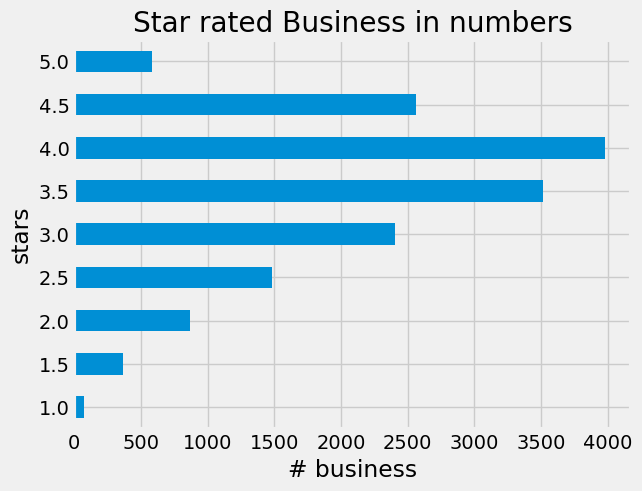

In [80]:
# sorted by star rating category and number of businesses.
business_df['stars'].value_counts().nlargest(20).sort_index().plot(kind='barh', title="Star rated Business in numbers", xlabel='# business')

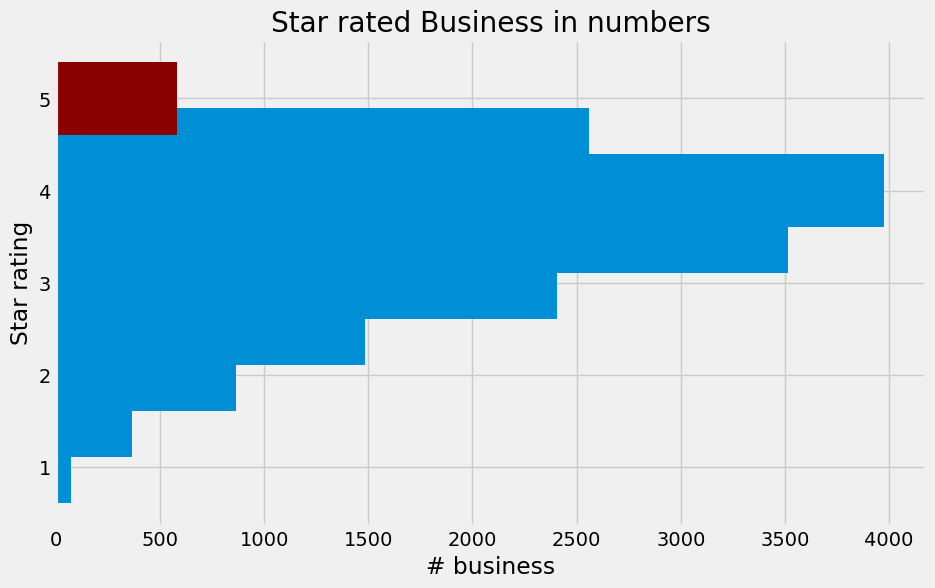

In [111]:
# Get the businesses with each star rating
star_counts = business_df['stars'].value_counts()

# Sort the star counts by index
star_counts = star_counts.sort_index()

# Create a bar chart of the star counts
plt.figure(figsize=(10, 6))
plt.barh(star_counts.index, star_counts.values)
plt.xlabel('# business')
plt.ylabel('Star rating')
plt.title("Star rated Business in numbers")

# Get the index of the largest value
max_index = star_counts.index.argmax()

# Highlight the color of the largest value
plt.barh(star_counts.index[max_index], star_counts.values[max_index], color='darkred')

# Show the plot
plt.show()

In [38]:
# correlation matrix between these variables
corr_columns=['stars','parking_available', 'review_count']
corr_mtrx=business_df[corr_columns].corr()
corr_mtrx

,stars,parking_available,review_count
stars,1.000000,0.128770,0.116865
parking_available,0.128770,1.000000,0.232302
review_count,0.116865,0.232302,1.000000


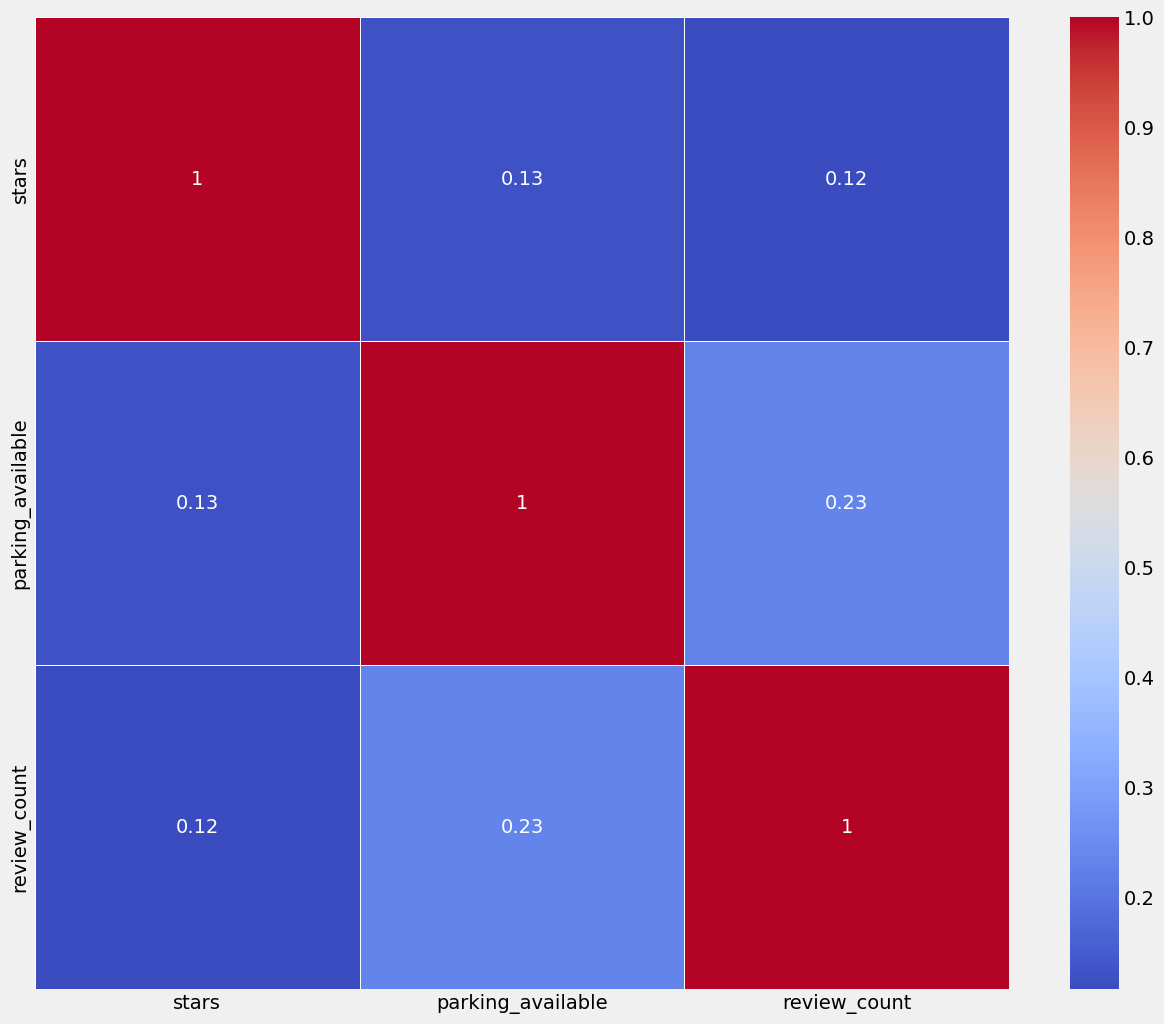

In [39]:
# draw the heatmap of correlation table
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

# Review Table analysis on stars

In [33]:
# call the rows for the Review table Approx 2m 48s
review_df = sf.get_dataframe(f'SELECT * FROM {schema}.{review_table}')
review_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2ZFa8nPwokMOD7imMBOLIA,75RntWgoKzw9hOnAG61lUw,6h7C53qLfwM7v3zKRqG0yA,4,22,16,17,I have never been so happy to find good Mexica...,2013-05-19
1,V3HAsCmFCED7G1K3D25fPQ,r8j64WCYkZjo6KwgGB-K_g,kK1re49IK3jmCYTL6B6_lw,1,3,0,1,I keep trying this place expecting more but am...,2014-08-03
2,84icNlECxC2yZ3W82lnZjg,Q5I2xTcaQ22bmE_mp2q_Rw,2fJ-WxJlUN6azp3bzrJ0zA,5,2,0,2,"Cheap, fast, good. All of those three.\n\nEasy...",2007-08-29
3,LyaYaqL-eICe4d_2MMb5ng,SblCFN3nomFep_l3jQQa4w,W-RVZSGas8B26O-kx5MD3A,1,1,0,0,Went for lunch and ordered the chicken somen n...,2016-04-19
4,QFtGwABFwhSJGu9MRhIZ1g,eP9g0ucAhIff4ZwdYrqcGg,IWHdx0NhDKADkGOgXgOFKQ,2,1,1,1,Overrated. Lacks some kind of sauce. The brocc...,2015-06-03
...,...,...,...,...,...,...,...,...,...
1205557,B72Iao4WyUEd3eiS1u42AQ,DwyevLE3RWfuBzgcJtRFyg,qJxOT7bo-PdW1-xx3nK8SQ,5,1,0,0,Stopped in for drinks and snacks. Good servic...,2014-04-07
1205558,mt-FV9sYJWDFKAwwy7PTUQ,7xo7tlew977EDs7MM0loMA,J8S7cPPlTgsQnXKVfTyN8g,1,13,6,4,"You gotta have the word ""sucker"" written acros...",2010-05-30
1205559,-30Zk9TrwLMk1PGO1_5xdw,xgPwcF_TQ_emrZDr_6SfwQ,WnnfNMayJxtPBEHqR9EbrQ,5,0,0,0,Simply the best coffee. We are lucky to live ...,2011-11-09
1205560,DyI-wPmusyEnfmace5XhOA,LQccPEIvCLNOI9PZE1jkQw,HFurEzHw6y5Kh90EMPHP5g,2,1,0,0,This one is CLOSED. Looks like they are teari...,2017-08-02


In [51]:
review_df["star_bin"] = pd.cut(
    review_df["stars"],
    bins=[0, 1, 4, 5],
    labels=["1-star", "2-4star", "5-star"],
)

In [104]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205562 entries, 0 to 1205561
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype   
---  ------       --------------    -----   
 0   review_id    1205562 non-null  object  
 1   user_id      1205562 non-null  object  
 2   business_id  1205562 non-null  object  
 3   stars        1205562 non-null  int64   
 4   useful       1205562 non-null  int64   
 5   funny        1205562 non-null  int64   
 6   cool         1205562 non-null  int64   
 7   text         1205562 non-null  object  
 8   date         1205562 non-null  object  
 9   star_bin     1205562 non-null  category
dtypes: category(1), int64(4), object(5)
memory usage: 83.9+ MB


In [110]:
review_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,star_bin
0,2ZFa8nPwokMOD7imMBOLIA,75RntWgoKzw9hOnAG61lUw,6h7C53qLfwM7v3zKRqG0yA,4,22,16,17,I have never been so happy to find good Mexica...,2013-05-19,2-4star
1,V3HAsCmFCED7G1K3D25fPQ,r8j64WCYkZjo6KwgGB-K_g,kK1re49IK3jmCYTL6B6_lw,1,3,0,1,I keep trying this place expecting more but am...,2014-08-03,1-star
2,84icNlECxC2yZ3W82lnZjg,Q5I2xTcaQ22bmE_mp2q_Rw,2fJ-WxJlUN6azp3bzrJ0zA,5,2,0,2,"Cheap, fast, good. All of those three.\n\nEasy...",2007-08-29,5-star
3,LyaYaqL-eICe4d_2MMb5ng,SblCFN3nomFep_l3jQQa4w,W-RVZSGas8B26O-kx5MD3A,1,1,0,0,Went for lunch and ordered the chicken somen n...,2016-04-19,1-star
4,QFtGwABFwhSJGu9MRhIZ1g,eP9g0ucAhIff4ZwdYrqcGg,IWHdx0NhDKADkGOgXgOFKQ,2,1,1,1,Overrated. Lacks some kind of sauce. The brocc...,2015-06-03,2-4star
...,...,...,...,...,...,...,...,...,...,...
1205557,B72Iao4WyUEd3eiS1u42AQ,DwyevLE3RWfuBzgcJtRFyg,qJxOT7bo-PdW1-xx3nK8SQ,5,1,0,0,Stopped in for drinks and snacks. Good servic...,2014-04-07,5-star
1205558,mt-FV9sYJWDFKAwwy7PTUQ,7xo7tlew977EDs7MM0loMA,J8S7cPPlTgsQnXKVfTyN8g,1,13,6,4,"You gotta have the word ""sucker"" written acros...",2010-05-30,1-star
1205559,-30Zk9TrwLMk1PGO1_5xdw,xgPwcF_TQ_emrZDr_6SfwQ,WnnfNMayJxtPBEHqR9EbrQ,5,0,0,0,Simply the best coffee. We are lucky to live ...,2011-11-09,5-star
1205560,DyI-wPmusyEnfmace5XhOA,LQccPEIvCLNOI9PZE1jkQw,HFurEzHw6y5Kh90EMPHP5g,2,1,0,0,This one is CLOSED. Looks like they are teari...,2017-08-02,2-4star


In [ ]:
review_df.groupby('stars').count()[['useful','funny','cool']]

In [55]:
# correlation matrix between these variables
corr_columns_r =['stars','useful', 'funny', 'cool']
corr_mtrx_r =review_df[corr_columns_r].corr()
corr_mtrx_r

,stars,useful,funny,cool
stars,1.000000,-0.044309,-0.065481,0.070233
useful,-0.044309,1.000000,0.692012,0.806803
funny,-0.065481,0.692012,1.000000,0.733505
cool,0.070233,0.806803,0.733505,1.000000


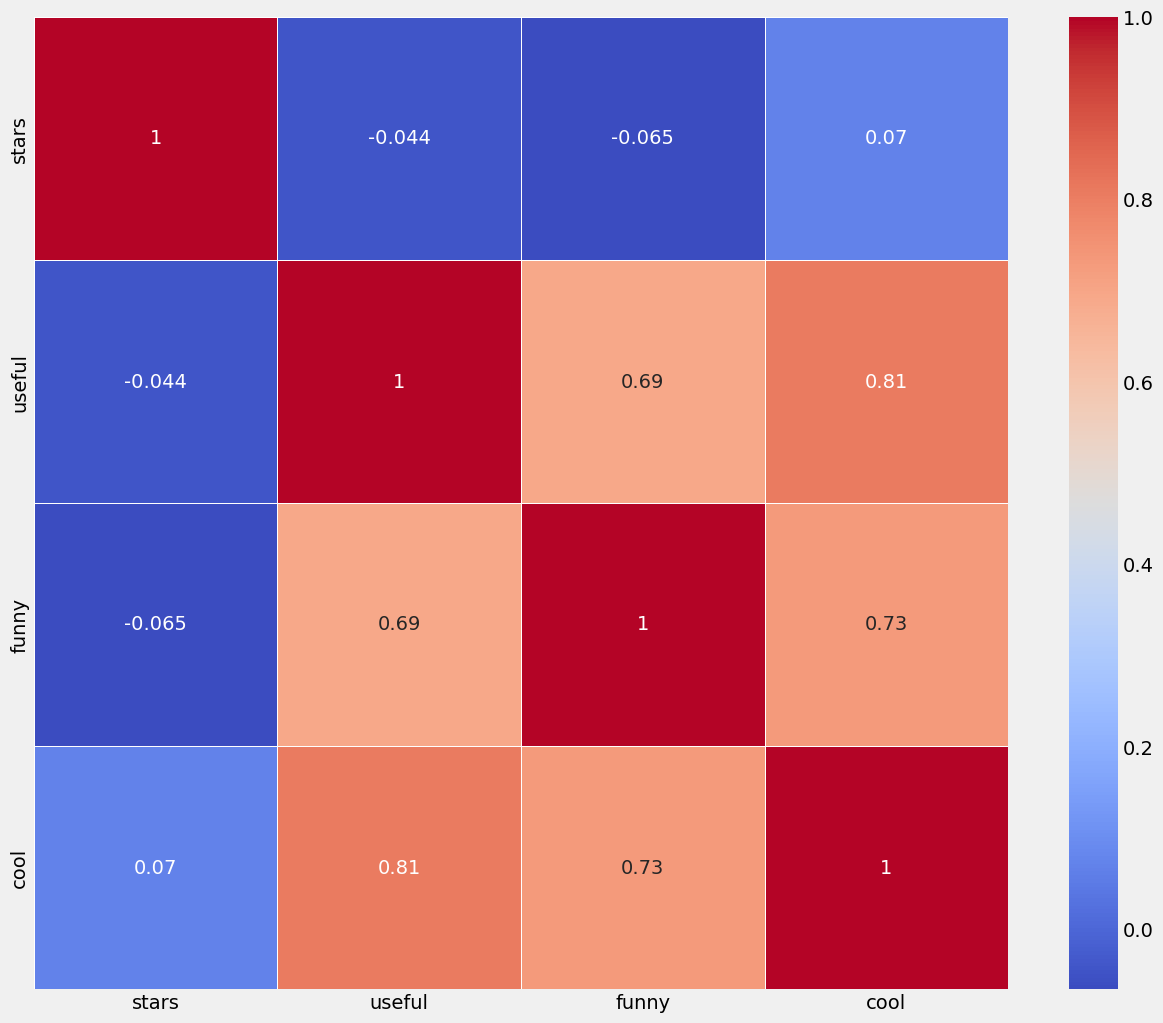

In [56]:
# draw the heatmap of correlation table
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx_r, linewidths=.5, annot=True, cmap='coolwarm')

In [109]:
# call the rows for the User table
user_df = sf.get_dataframe(f'SELECT * FROM {schema}.{user_table}')
user_df

,user_id,name,review_count,useful,funny,cool,fans,average_stars,comp_count,friends_count,elite_count
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,7217,1259,5994,267,3.91,2406,14995.0,1.0
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,43091,13066,27281,3138,3.74,17500,4646.0,14.0
2,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,14953,9940,11211,1357,3.85,13164,5843.0,9.0
3,AUi8MPWJ0mLkMfwbui27lg,John,109,154,20,23,4,3.40,10,64.0,NaN
4,1McG5Rn_UDkmlkZOrsdptg,Teresa,7,18,3,13,1,4.29,4,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
327491,XTWARBzLbiJKQ1JeJB9f3g,Sakina,6,1,0,0,0,2.83,0,NaN,NaN
327492,K-BNvWUCWEGUuBirCU4mmg,Jodi,2,0,0,0,0,5.00,0,NaN,NaN
327493,5GJYbsi6PMLxoRIGh8qE1w,Erin,1,0,0,0,0,4.00,0,NaN,NaN
327494,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,7,0,0,0,4.92,0,NaN,NaN
